# Analyzing Police Activity with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from jupyterthemes import jtplot

jtplot.style()
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Preparing the data for analysis

## 1. Stanford Open Policing Project dataset

### Introduction to the dataset

* Traffic stops by police officers
* Download [data](https://openpolicing.stanford.edu/) for any state

<img src='Analyzing_Police_Activity_with_pandas/Pictures/us-map.png' alt='US map' width=400 align='left'>

### Preparing the data

* Examine the data
* Clean the data
* Each row represents one traffic stop
* `NaN` indicates a missing value

In [2]:
ri_1 = pd.read_csv('Analyzing_Police_Activity_with_pandas/police.csv')
ri_1.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


### Locating missing values

* `sum()` calculates the sum of each column
* `True = 1`, `False = 0`

In [3]:
ri_1.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [4]:
ri_1.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

### Dropping a column

* `county_name` column only contains missing values
* Drop `county_name` using the `drop()` method

In [5]:
ri_1.shape

(91741, 15)

In [6]:
ri_1.drop('county_name', axis='columns', inplace=True)

### Dropping rows

* `dropna()`: Drop rows based on the presence of missing values

In [7]:
ri_1.dropna(subset=['stop_date', 'stop_time'], inplace=True)

### №1 Examining the dataset

* Read the file police.csv into a DataFrame named `ri`
* Examine the first 5 rows of the DataFrame (known as the `head`)
* Count the number of missing values in each column: Use `.isnull()` to check which DataFrame elements are missing, and then take the `.sum()` to count the number of `True` values in each column

In [8]:
ri = pd.read_csv('Analyzing_Police_Activity_with_pandas/police.csv')

print(ri.head(), '\n')
print(ri.isnull().sum())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

### №2 Dropping columns

* Count the number of missing values in each column
* Examine the DataFrame's `.shape` to find out the number of rows and columns
* Drop both the `county_name` and state columns by passing the column names to the `.drop() `method as a list of strings
* Examine the `.shape` again to verify that there are now two fewer columns

In [9]:
print(ri.isnull().sum(), '\n')
print(ri.shape)

ri.drop(['county_name', 'state'], axis='columns', inplace=True)

print(ri.shape)

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64 

(91741, 15)
(91741, 13)


### №3 Dropping rows

* Count the number of missing values in each column
* Drop all rows that are missing `driver_gender` by passing the column name to the `subset` parameter of `.dropna()`
* Count the number of missing values in each column again, to verify that none of the remaining rows are missing `driver_gender`
* Examine the DataFrame's `.shape` to see how many rows and columns remain

In [10]:
print(ri.isnull().sum())

ri.dropna(subset=['driver_gender'], inplace=True)

print(ri.isnull().sum())
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


## 2. Using proper data types

### Examining the data types

* `object`: Python strings (or other Python objects)
* `bool`: `True` and `False` values
* Other types: `int`, `float`, `datetime`, `category`

In [11]:
ri_1.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

### Why do data types matter?

* Affects which operations you can perform
* Avoid storing data as strings (when possible)
    * `int`, `float`: enables mathematical operations
    * `datetime`: enables date-based attributes and methods
    * `category`: uses less memory and runs faster
    * `bool`: enables logical and mathematical operations

### Fixing a data type

* Dot notation: `apple.price`
* Bracket notation: `apple['price']`
    * Must be used on the left side of an assignment statement

In [12]:
apple = pd.DataFrame({'date': ['2/13/18', '2/14/18', '2/15/18'],
                      'time': ['16:00', '16:00', '16:00'],
                      'price': ['164.34', '167.37', '172.99']})
apple

,date,time,price
0,2/13/18,16:00,164.34
1,2/14/18,16:00,167.37
2,2/15/18,16:00,172.99


In [13]:
apple.price.dtype

dtype('O')

In [14]:
apple['price'] = apple.price.astype('float')
apple.price.dtype

dtype('float64')

### №4 Finding an incorrect data type

Explore the ri DataFrame in the IPython Shell to determine which column's data type should be changed

>**Possible Answers**
>* `stop_time` should have a data type of `float`
>* `search_conducted` should have a data type of `object`
>* *`is_arrested` should have a data type of `bool`*
>* `district` should have a data type of `int`

### №5 Fixing a data type

* Examine the head of the `is_arrested` column to verify that it contains `True` and `False` values
* Check the current data type of `is_arrested`
* Use the `.astype()` method to convert `is_arrested` to a `bool` column
* Check the new data type of `is_arrested`, to confirm that it is now a `bool` column

In [15]:
print(ri.is_arrested.head(), '\n')
print(ri.is_arrested.dtype)

ri['is_arrested'] = ri.is_arrested.astype('bool')

print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object 

object
bool


## 3. Creating a DatetimeIndex

### Using datetime format

1. Combine `stop_date` and `stop_time` into one column
2. Convert it to `datetime` format

In [16]:
ri_1.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

### Combining object columns



In [17]:
apple.date.str.replace('/','-')

0    2-13-18
1    2-14-18
2    2-15-18
Name: date, dtype: object

In [18]:
combined = apple.date.str.cat(apple.time, sep=' ')

In [19]:
combined

0    2/13/18 16:00
1    2/14/18 16:00
2    2/15/18 16:00
Name: date, dtype: object

### Converting to datetime format

In [20]:
apple['date_and_time'] = pd.to_datetime(combined)

In [21]:
apple

,date,time,price,date_and_time
0,2/13/18,16:00,164.34,2018-02-13 16:00:00
1,2/14/18,16:00,167.37,2018-02-14 16:00:00
2,2/15/18,16:00,172.99,2018-02-15 16:00:00


In [22]:
apple.dtypes

date                     object
time                     object
price                   float64
date_and_time    datetime64[ns]
dtype: object

### Setting the index

In [23]:
apple.set_index('date_and_time', inplace=True)

In [24]:
apple

,date,time,price
date_and_time,,,
2018-02-13 16:00:00,2/13/18,16:00,164.34
2018-02-14 16:00:00,2/14/18,16:00,167.37
2018-02-15 16:00:00,2/15/18,16:00,172.99


In [25]:
apple.index

DatetimeIndex(['2018-02-13 16:00:00', '2018-02-14 16:00:00',
               '2018-02-15 16:00:00'],
              dtype='datetime64[ns]', name='date_and_time', freq=None)

In [26]:
apple.columns

Index(['date', 'time', 'price'], dtype='object')

### №6 Combining object columns

* Use a string method to concatenate `stop_date` and `stop_time` (separated by a space), and store the result in `combined`
* Convert `combined` to `datetime` format, and store the result in a new column named `stop_datetime`
* Examine the DataFrame `.dtypes` to confirm that `stop_datetime` is a `datetime` column

In [27]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

ri['stop_datetime'] = pd.to_datetime(combined)

print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


### №7 Setting the index

* Set `stop_datetime` as the DataFrame index
* Examine the index to verify that it is a `DatetimeIndex`
* Examine the DataFrame columns to confirm that `stop_datetime` is no longer one of the columns

In [28]:
ri.set_index('stop_datetime', inplace=True)

print(ri.index, '\n')
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None) 

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## Chapter 2. Exploring the relationship between gender and policing

## 4. Do the genders commit different violations?

### Counting unique values

* `value_counts()`: Counts the unique values in a Series
* Best suited for categorical data

In [29]:
ri.stop_outcome.value_counts()

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [30]:
ri.stop_outcome.value_counts().sum()

86536

In [31]:
ri.shape

(86536, 13)

### Expressing counts as proportions

In [32]:
77091/86536

0.8908546731995932

In [33]:
ri.stop_outcome.value_counts(normalize=True)

Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

### Filtering DataFrame rows

In [34]:
ri.driver_race.value_counts()

White       61870
Black       12285
Hispanic     9727
Asian        2389
Other         265
Name: driver_race, dtype: int64

In [35]:
white = ri[ri.driver_race == 'White']
white.shape

(61870, 13)

### Comparing stop outcomes for two groups

In [36]:
white.stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [37]:
asian = ri[ri.driver_race == 'Asian']

In [38]:
asian.stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

### №8 Examining traffic violations

* Count the unique values in the `violation` column of the `ri` DataFrame, to see what violations are being committed by all drivers
* Express the violation counts as proportions of the total

In [39]:
print(ri.violation.value_counts(), '\n')
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64 

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


### №8 Comparing violations by gender

* Create a DataFrame, female, that only contains rows in which driver_gender is 'F'
* Create a DataFrame, male, that only contains rows in which driver_gender is 'M'
* Count the violations committed by female drivers and express them as proportions
* Count the violations committed by male drivers and express them as proportions

In [40]:
female = ri[ri['driver_gender'] == 'F']
male = ri[ri['driver_gender'] == 'M']

print(female.violation.value_counts(normalize=True), '\n')
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64 

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


## 5. Does gender affect who gets a ticket for speeding?

### Filtering by multiple conditions (1)

* Each condition is surrounded by parentheses
* Ampersand (`&`) represents the `and` operator
* Only includes female drivers who were arrested

In [41]:
female = ri[ri.driver_gender == 'F']
female.shape

(23774, 13)

In [42]:
female_and_arrested = ri[(ri.driver_gender == 'F') & (ri.is_arrested == True)]
female_and_arrested.shape

(669, 13)

### Filtering by multiple conditions (2)

* Pipe (`|`) represents the `or` operator
* Includes all females
* Includes all drivers who were arrested

In [43]:
female_or_arrested = ri[(ri.driver_gender == 'F') | (ri.is_arrested == True)]
female_or_arrested.shape

(26183, 13)

### Rules for filtering by multiple conditions

* Ampersand (`&`): only include rows that satisfy both conditions
* Pipe (`|`): include rows that satisfy either condition
* Each condition must be surrounded by parentheses
* Conditions can check for equality (`==`), inequality (`!=`), etc.
* Can use more than two conditions

### Correlation, not causation

* Analyze the relationship between gender and stop outcome
    * Assess whether there is a correlation
* Not going to draw any conclusions about causation
    * Would need additional data and expertise
    * Exploring relationships only

### №9 Filtering by multiple conditions

Which one of these commands would filter the ri DataFrame to only include female drivers who were stopped for a speeding violation?

>**Possible Answers**
>* `ri[(ri.driver_gender = 'F') & (ri.violation = 'Speeding')]`
>* `ri[ri.driver_gender == 'F' & ri.violation == 'Speeding']`
>* *`ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]`*
>* `ri[(ri.driver_gender == 'F') | (ri.violation == 'Speeding')]`
>* `ri[(ri.driver_gender == 'F') and (ri.violation == 'Speeding')]`

### №10 Comparing speeding outcomes by gender

* Create a DataFrame, `female_and_speeding`, that only includes female drivers who were stopped for speeding
* Create a DataFrame, `male_and_speeding`, that only includes male drivers who were stopped for speeding
* Count the stop outcomes for the female drivers and express them as proportions
* Count the stop outcomes for the male drivers and express them as proportions

In [44]:
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

print(female_and_speeding.stop_outcome.value_counts(normalize=True), '\n')
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64 

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


## 6. Does gender affect whose vehicle is searched?

### Math with Boolean values

* `True = 1`, `False = 0`
* Mean of Boolean Series represents percentage of `True` values

In [45]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [46]:
np.mean([0, 1, 0, 0])

0.25

In [47]:
np.mean([False, True, False, False])

0.25

### Taking the mean of a Boolean Series

In [48]:
ri.is_arrested.value_counts(normalize=True)

False    0.964431
True     0.035569
Name: is_arrested, dtype: float64

In [49]:
ri.is_arrested.mean()

0.0355690117407784

In [50]:
ri.is_arrested.dtype

dtype('bool')

### Comparing groups using groupby

* Study the arrest rate by police district

In [51]:
ri.district.unique()

array(['Zone X4', 'Zone K3', 'Zone X1', 'Zone X3', 'Zone K1', 'Zone K2'],
      dtype=object)

In [52]:
ri[ri.district == 'Zone K1'].is_arrested.mean()

0.024349083895853423

In [53]:
ri[ri.district == 'Zone K2'].is_arrested.mean()

0.030800588834786546

In [54]:
ri.groupby('district').is_arrested.mean()

district
Zone K1    0.024349
Zone K2    0.030801
Zone K3    0.032311
Zone X1    0.023494
Zone X3    0.034871
Zone X4    0.048038
Name: is_arrested, dtype: float64

### Grouping by multiple categories

In [55]:
ri.groupby(['district', 'driver_gender']).is_arrested.mean()

district  driver_gender
Zone K1   F                0.019169
          M                0.026588
Zone K2   F                0.022196
          M                0.034285
Zone K3   F                0.025156
          M                0.034961
Zone X1   F                0.019646
          M                0.024563
Zone X3   F                0.027188
          M                0.038166
Zone X4   F                0.042149
          M                0.049956
Name: is_arrested, dtype: float64

In [56]:
ri.groupby(['driver_gender', 'district']).is_arrested.mean()

driver_gender  district
F              Zone K1     0.019169
               Zone K2     0.022196
               Zone K3     0.025156
               Zone X1     0.019646
               Zone X3     0.027188
               Zone X4     0.042149
M              Zone K1     0.026588
               Zone K2     0.034285
               Zone K3     0.034961
               Zone X1     0.024563
               Zone X3     0.038166
               Zone X4     0.049956
Name: is_arrested, dtype: float64

### №11 Calculating the search rate

* Check the data type of `search_conducted` to confirm that it's a Boolean Series
* Calculate the search rate by counting the Series values and expressing them as proportions
* Calculate the search rate by taking the mean of the Series (It should match the proportion of `True` values calculated above)

In [57]:
print(ri.search_conducted.dtype, '\n')
print(ri.search_conducted.value_counts(normalize=True), '\n')
print(ri.search_conducted.mean())

bool 

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64 

0.0382153092354627


### №12 Comparing search rates by gender

1. Filter the DataFrame to only include female drivers, and then calculate the search rate by taking the mean of `search_conducted`

In [58]:
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


2. Filter the DataFrame to only include male drivers, and then repeat the search rate calculation

In [59]:
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


3. Group by driver gender to calculate the search rate for both groups simultaneously

In [60]:
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


### №13 Adding a second factor to the analysis

1. Use a `.groupby()` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [61]:
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


2. Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way

In [62]:
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


## 7. Does gender affect who is frisked during a search?

### Examining the search types (1)

* `value_counts()` excludes missing values by default
* `dropna=False` displays missing values

In [63]:
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [64]:
ri.search_type.value_counts(dropna=False)

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
Incident to Arrest,Inventory,Protective Frisk                  18
Incident t

### Examining the search types (2)

* Multiple values are separated by commas
* 219 searches in which `'Inventory'` was the only search type
* Locate `'Inventory'` among multiple search types

In [65]:
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

### Searching for a string

* `str.contains()` returns `True` if string is found, `False` if not found
* `na=False` returns `False` when it finds a missing value
* `True` means an inventory was done, `False` means it was not

In [66]:
ri['inventory'] = ri.search_type.str.contains('Inventory', na=False)
ri.inventory.dtype

dtype('bool')

In [67]:
ri.inventory.sum()

441

### Calculating the inventory rate

* 0.5% of all traffic stops resulted in an inventory
* 13.3% of searches included an inventory

In [68]:
ri.inventory.mean()

0.0050961449570121106

In [69]:
searched = ri[ri.search_conducted == True]
searched.inventory.mean()

0.13335349259147264

### №14 Counting protective frisks

* Count the `search_type` values to see how many times `'Protective Frisk'` was the only search type
* Create a new column, `frisk`, that is `True` if `search_type` contains the string `'Protective Frisk'` and `False` otherwise
* Check the data type of `frisk` to confirm that it's a Boolean Series
* Take the sum of `frisk` to count the total number of frisks

In [70]:
print(ri.search_type.value_counts(), '\n')

ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

print(ri.frisk.dtype)
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

### №15 Comparing frisk rates by gender

* Create a DataFrame, `searched`, that only contains rows in which `search_conducted` is `True`
* Take the mean of the `frisk` column to find out what percentage of searches included a frisk
* Calculate the frisk rate for each gender using a `.groupby()`

In [71]:
searched = ri[ri.search_conducted == True]

print(searched.frisk.mean(), '\n')
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065 

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## Chapter 3. Visual exploratory data analysis

## 8. Does time of day affect arrest rate?

### Accessing datetime attributes (1)

In [72]:
apple_2 = pd.DataFrame({'price': [174.35, 174.33, 155.15, 156.41, 176.94, 179.98],
                        'volume': [20567800, 21584000, 54390500, 70672600, 23774100, 32185200],
                        'date_and_time': ['2018-01-08 16:00:00', '2018-01-09 16:00:00',
                                          '2018-02-08 16:00:00', '2018-02-09 16:00:00',
                                          '2018-03-08 16:00:00', '2018-03-09 16:00:00']})
apple_2.date_and_time = pd.to_datetime(apple_2.date_and_time)
apple_2

,price,volume,date_and_time
0,174.35,20567800,2018-01-08 16:00:00
1,174.33,21584000,2018-01-09 16:00:00
2,155.15,54390500,2018-02-08 16:00:00
3,156.41,70672600,2018-02-09 16:00:00
4,176.94,23774100,2018-03-08 16:00:00
5,179.98,32185200,2018-03-09 16:00:00


In [73]:
apple_2.dtypes

price                   float64
volume                    int64
date_and_time    datetime64[ns]
dtype: object

In [74]:
apple_2.date_and_time.dt.month

0    1
1    1
2    2
3    2
4    3
5    3
Name: date_and_time, dtype: int64

### Accessing datetime attributes (2)

* `dt` accessor is not used with a DatetimeIndex

In [75]:
apple_2.set_index('date_and_time', inplace=True)
apple_2.index

DatetimeIndex(['2018-01-08 16:00:00', '2018-01-09 16:00:00',
               '2018-02-08 16:00:00', '2018-02-09 16:00:00',
               '2018-03-08 16:00:00', '2018-03-09 16:00:00'],
              dtype='datetime64[ns]', name='date_and_time', freq=None)

In [76]:
apple_2.index.month

Int64Index([1, 1, 2, 2, 3, 3], dtype='int64', name='date_and_time')

### Calculating the monthly mean price

* `apple.groupby('month').price.mean()` is invalid

In [77]:
apple_2.price.mean()

169.52666666666667

In [78]:
monthly_price = apple_2.groupby(apple_2.index.month).price.mean()
monthly_price

date_and_time
1    174.34
2    155.78
3    178.46
Name: price, dtype: float64

### Plotting the monthly mean price

* Line plot: Series index on x-axis, Series values on y-axis

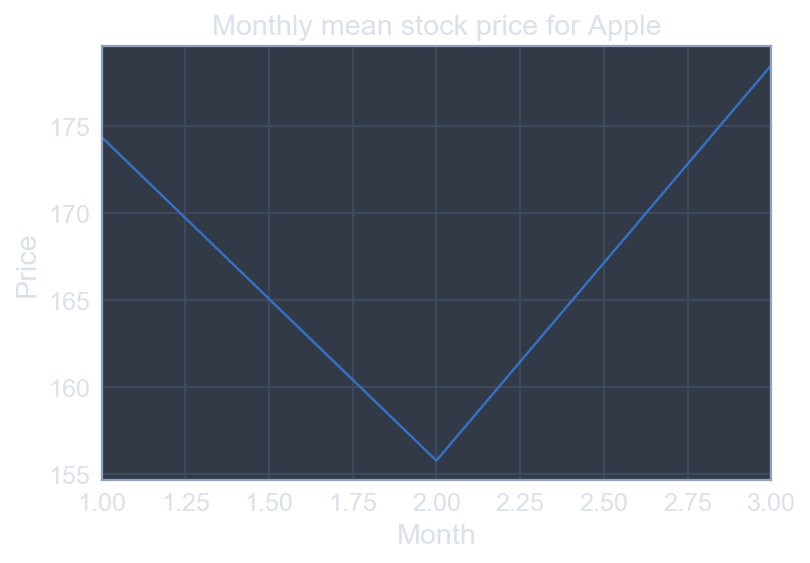

In [79]:
monthly_price.plot()
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Monthly mean stock price for Apple')
plt.show()

### №16 Calculating the hourly arrest rate

* Take the mean of the `is_arrested` column to calculate the overall arrest rate
* Group by the `hour` attribute of the DataFrame index to calculate the hourly arrest rate
* Save the hourly arrest rate Series as a new object, `hourly_arrest_rate`

In [80]:
print(ri.is_arrested.mean())
print(ri.groupby(ri.index.hour).is_arrested.mean())

hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


### №17 Plotting the hourly arrest rate

* Create a line plot of `hourly_arrest_rate` using the `.plot()` method
* Label the x-axis as `'Hour'`, label the y-axis as `'Arrest Rate'`, and title the plot `'Arrest Rate by Time of Day'`
* Display the plot using the `.show()` function

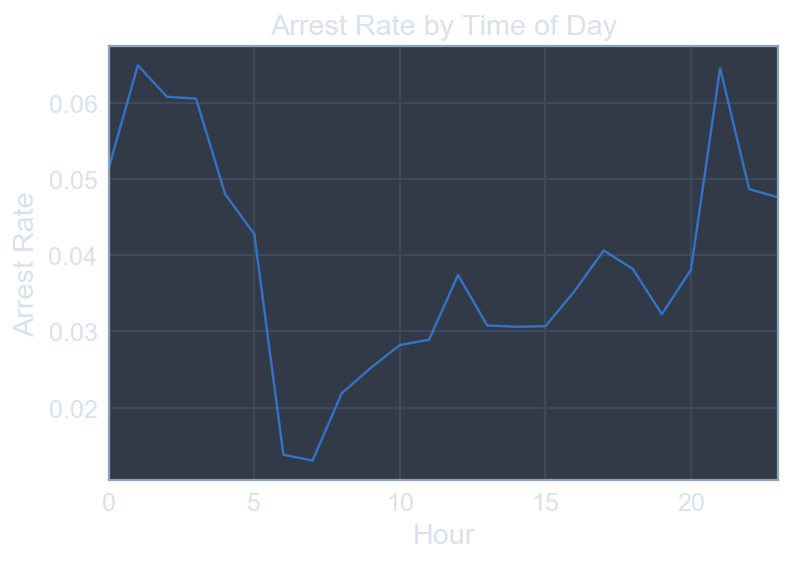

In [81]:
hourly_arrest_rate.plot()

plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

plt.show()

## 9. Are drug-related stops on the rise?

### Resampling the price

In [82]:
apple_2.groupby(apple_2.index.month).price.mean()

date_and_time
1    174.34
2    155.78
3    178.46
Name: price, dtype: float64

In [83]:
apple_2.price.resample('M').mean()

date_and_time
2018-01-31    174.34
2018-02-28    155.78
2018-03-31    178.46
Freq: M, Name: price, dtype: float64

### Resampling the volume

In [84]:
apple_2.volume.resample('M').mean()

date_and_time
2018-01-31    21075900
2018-02-28    62531550
2018-03-31    27979650
Freq: M, Name: volume, dtype: int64

### Concatenating price and volume

In [85]:
monthly_price = apple_2.price.resample('M').mean()
monthly_volume = apple_2.volume.resample('M').mean()

In [86]:
monthly = pd.concat([monthly_price, monthly_volume], axis='columns')
monthly

,price,volume
date_and_time,,
2018-01-31,174.34,21075900
2018-02-28,155.78,62531550
2018-03-31,178.46,27979650


### Plotting price and volume (1)

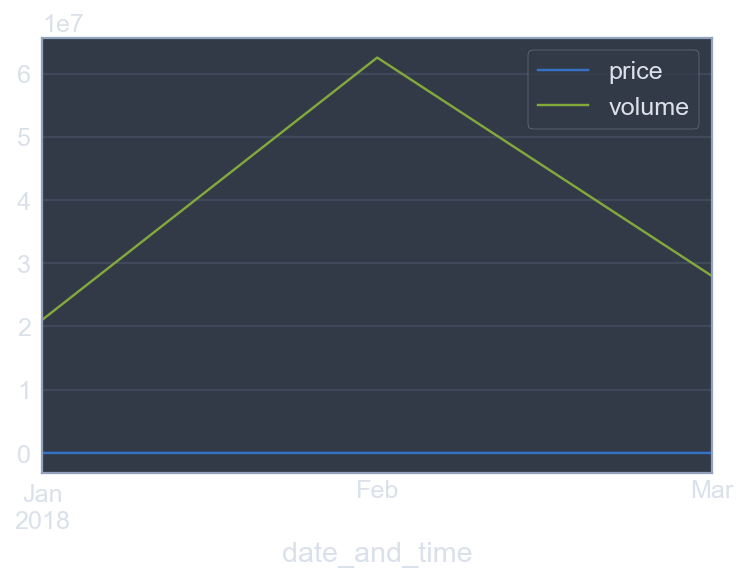

In [87]:
monthly.plot()
plt.show()

### Plotting price and volume (2)

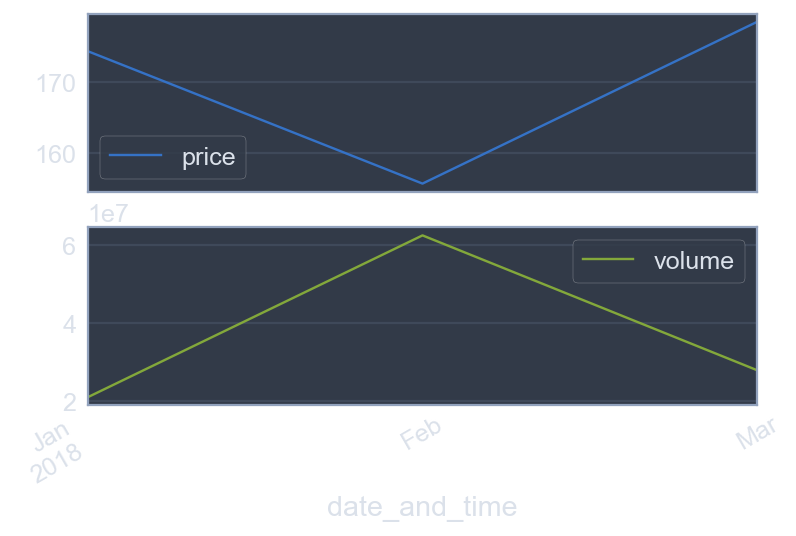

In [88]:
monthly.plot(subplots=True)
plt.show()

### №18 Plotting drug-related stops

* Calculate the annual rate of drug-related stops by resampling the `drugs_related_stop` column (on the `'A'` frequency) and taking the mean
* Save the annual drug rate Series as a new object, `annual_drug_rate`
* Create a line plot of `annual_drug_rate` using the `.plot()` method
* Display the plot using the `.show()` function

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


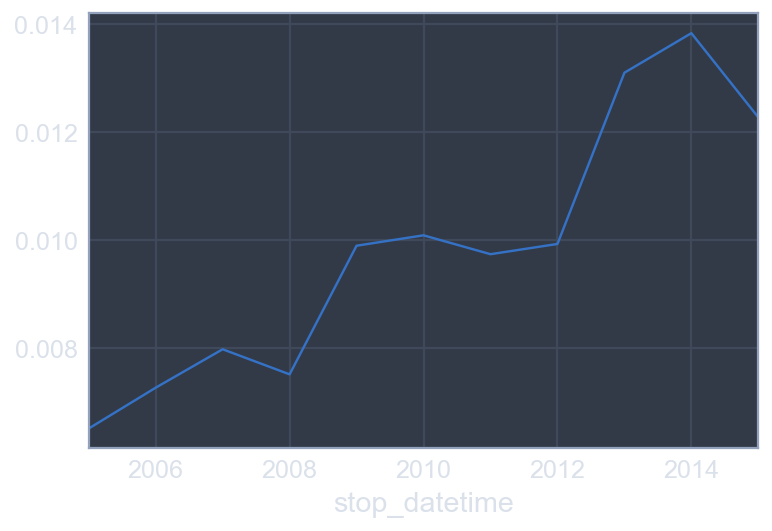

In [89]:
print(ri.drugs_related_stop.resample('A').mean())
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

annual_drug_rate.plot()
plt.show()

### №19 Comparing drug and search rates

* Calculate the annual search rate by resampling the `search_conducted` column, and save the result as `annual_search_rate`
* Concatenate `annual_drug_rate` and `annual_search_rate` along the columns axis, and save the result as `annual`
* Create subplots of the drug and search rates from the annual DataFrame
* Display the subplots

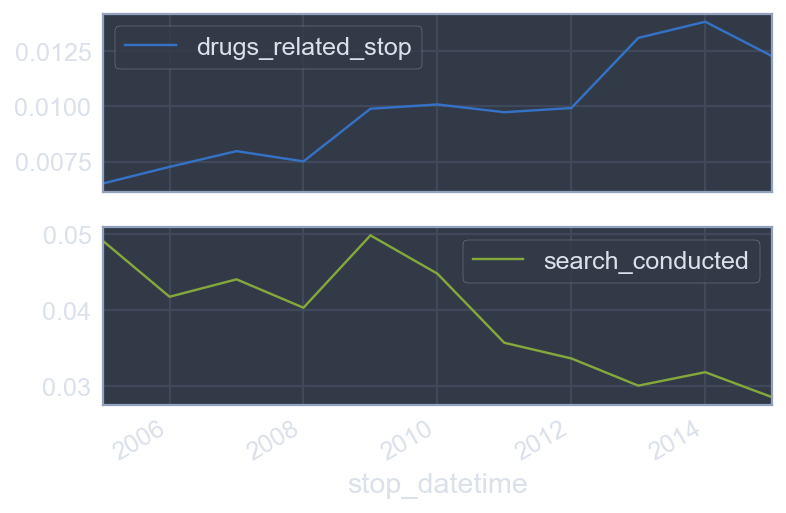

In [90]:
annual_search_rate = ri.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

annual.plot(subplots=True)
plt.show()

## 10. What violations are caught in each district?

### Computing a frequency table

* Frequency table: Tally of how many times each combination of values occurs
* `driver_race` is along the index, `driver_gender` is along the columns

In [91]:
pd.crosstab(ri.driver_race, ri.driver_gender)

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [92]:
ri[(ri.driver_race == 'Asian') & (ri.driver_gender == 'F')].shape

(551, 15)

In [93]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)

### Selecting a DataFrame slice

* `loc` accessor: Select from a DataFrame by label

In [94]:
table

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774
Other,53,212
White,18536,43334


In [95]:
table.loc['Asian':'Hispanic']

driver_gender,F,M
driver_race,,
Asian,551,1838
Black,2681,9604
Hispanic,1953,7774


In [96]:
table = table.loc['Asian':'Hispanic']

### Creating a line plot

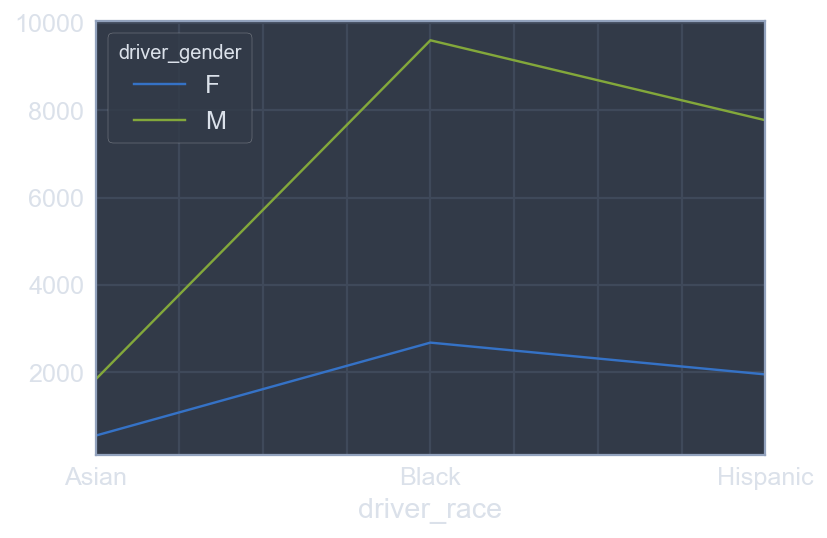

In [97]:
table.plot()
plt.show()

### Creating a bar plot

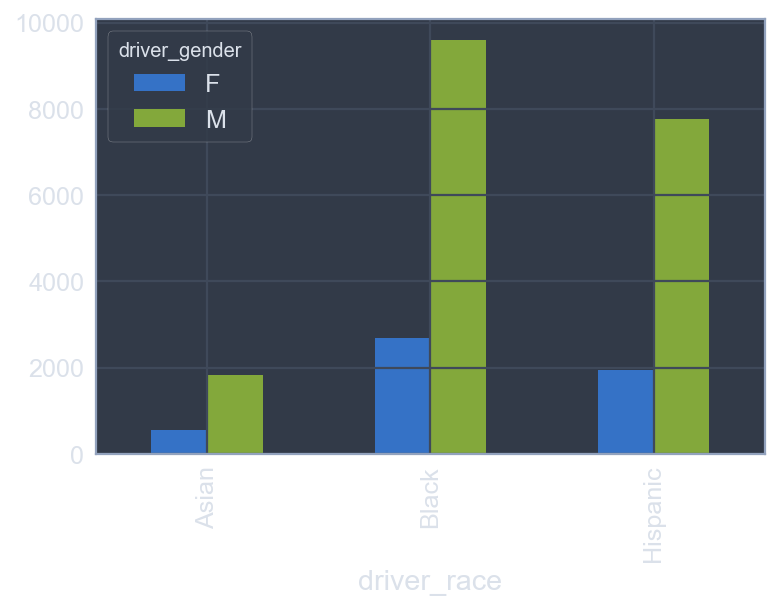

In [98]:
table.plot(kind='bar')
plt.show()

### Stacking the bars

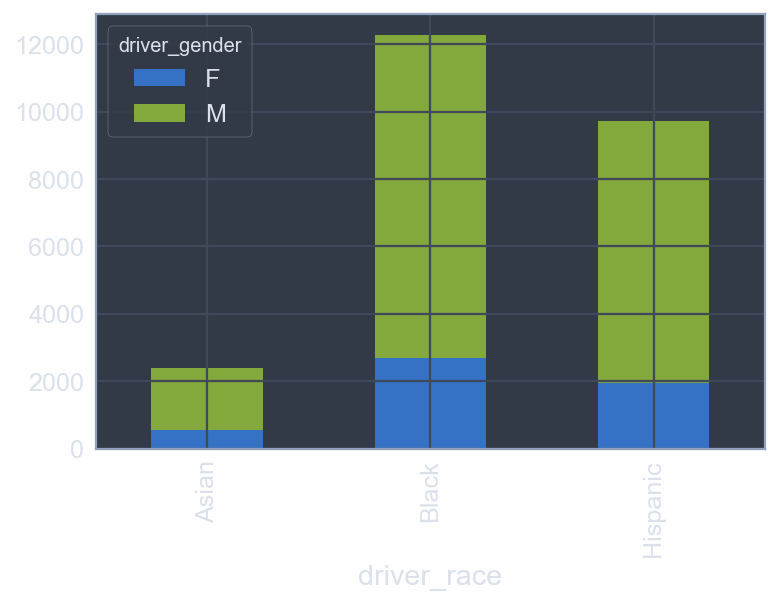

In [99]:
table.plot(kind='bar', stacked=True)
plt.show()

### №20 Tallying violations by district

* Create a frequency table from the `district` and `violation` columns using the `pd.crosstab()` function
* Save the frequency table as a new object, `all_zones`
* Select rows `'Zone K1'` through `'Zone K3'` from `all_zones` using the `.loc[]` accessor
* Save the smaller table as a new object, `k_zones`

In [100]:
print(pd.crosstab(ri.district, ri.violation), '\n')
all_zones = pd.crosstab(ri.district, ri.violation)

print(all_zones.loc['Zone K1':'Zone K3'])
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795   

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1    

### №21 Plotting violations by district

1. 
    * Create a bar plot of `k_zones`
    * Display the plot and examine it. What do you notice about each of the zones?

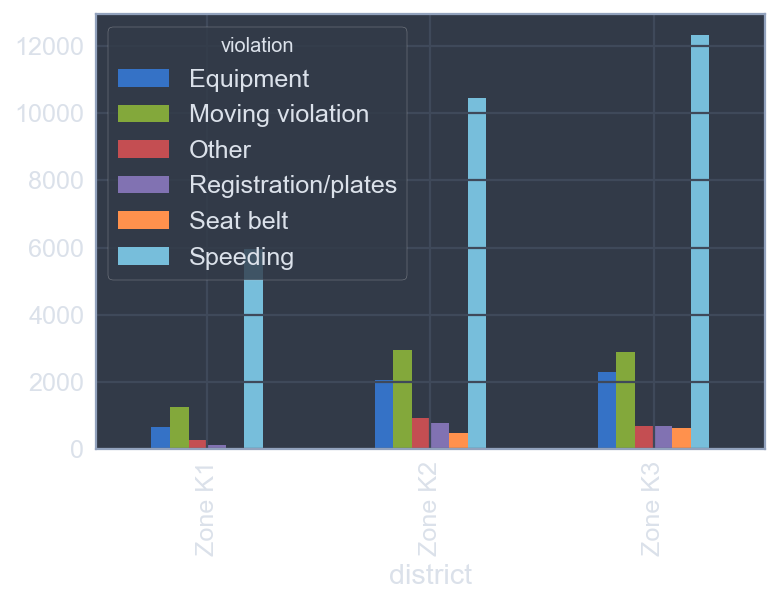

In [101]:
k_zones.plot(kind='bar')
plt.show()

2. 
    * Create a stacked bar plot of `k_zones`
    * Display the plot and examine it. Do you notice anything different about the data than you did previously? 

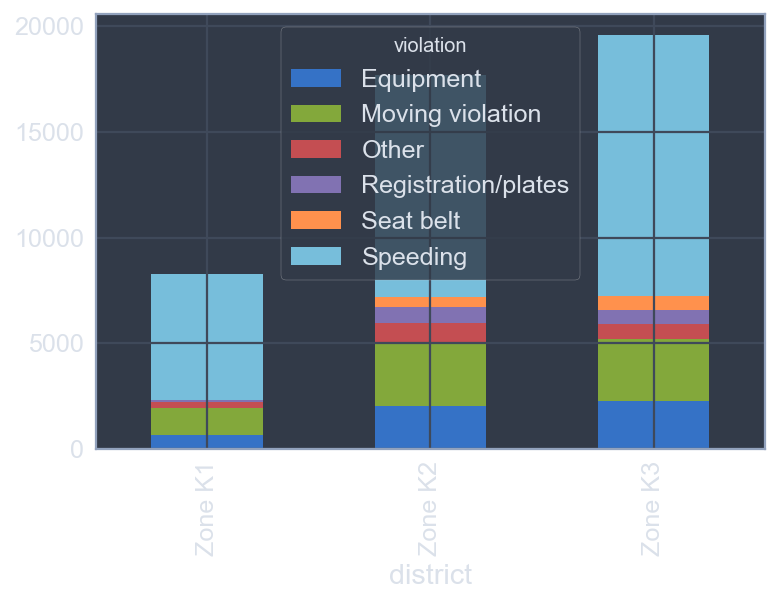

In [102]:
k_zones.plot(kind='bar', stacked=True)
plt.show()

## 11. How long might you be stopped for a violation?

### Analyzing an object column

* Create a Boolean column: `True` if the price went up, and `False` otherwise
* Calculate how often the price went up by taking the column mean
* `astype()` can't be used in this case

In [103]:
apple_2['change'] = ['down', 'down', 'down', 'up', 'up', 'up']
apple_2

,price,volume,change
date_and_time,,,
2018-01-08 16:00:00,174.35,20567800,down
2018-01-09 16:00:00,174.33,21584000,down
2018-02-08 16:00:00,155.15,54390500,down
2018-02-09 16:00:00,156.41,70672600,up
2018-03-08 16:00:00,176.94,23774100,up
2018-03-09 16:00:00,179.98,32185200,up


In [104]:
apple_2.change.dtype

dtype('O')

### Mapping one set of values to another

* Dictionary maps the values you have to the values you want

In [105]:
mapping = {'up':True, 'down':False}

apple_2['is_up'] = apple_2.change.map(mapping)

apple_2

,price,volume,change,is_up
date_and_time,,,,
2018-01-08 16:00:00,174.35,20567800,down,False
2018-01-09 16:00:00,174.33,21584000,down,False
2018-02-08 16:00:00,155.15,54390500,down,False
2018-02-09 16:00:00,156.41,70672600,up,True
2018-03-08 16:00:00,176.94,23774100,up,True
2018-03-09 16:00:00,179.98,32185200,up,True


In [106]:
apple_2.is_up.mean()

0.5

### Calculating the search rate

* Visualize how often searches were performed after each type of violation
* Returns a Series sorted in alphabetical order

In [107]:
search_rate = ri.groupby('violation').search_conducted.mean()
search_rate

violation
Equipment              0.064280
Moving violation       0.057014
Other                  0.045362
Registration/plates    0.093438
Seat belt              0.031513
Speeding               0.021560
Name: search_conducted, dtype: float64

### Creating a bar plot

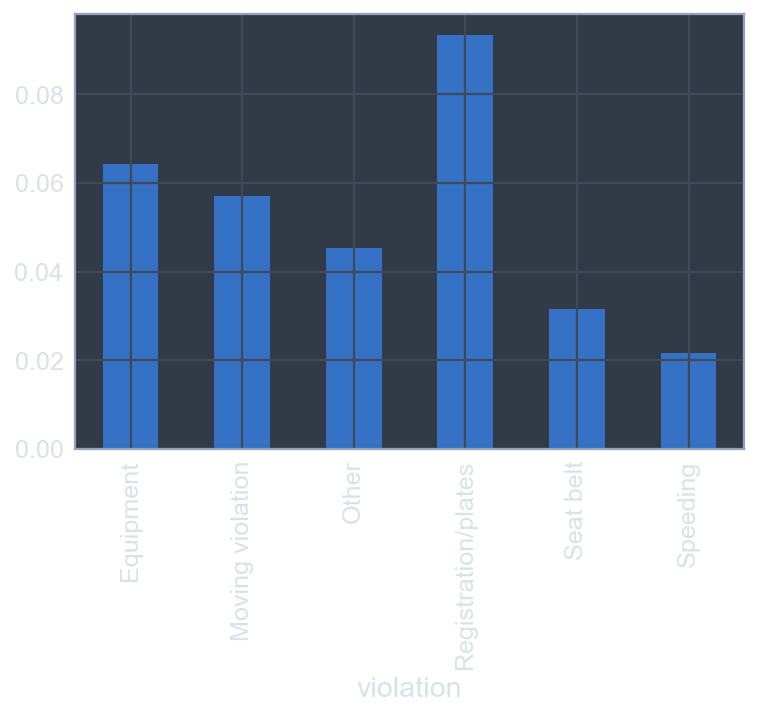

In [108]:
search_rate.plot(kind='bar')
plt.show()

### Ordering the bars

* Order the bars from left to right by size

In [109]:
search_rate.sort_values()

violation
Speeding               0.021560
Seat belt              0.031513
Other                  0.045362
Moving violation       0.057014
Equipment              0.064280
Registration/plates    0.093438
Name: search_conducted, dtype: float64

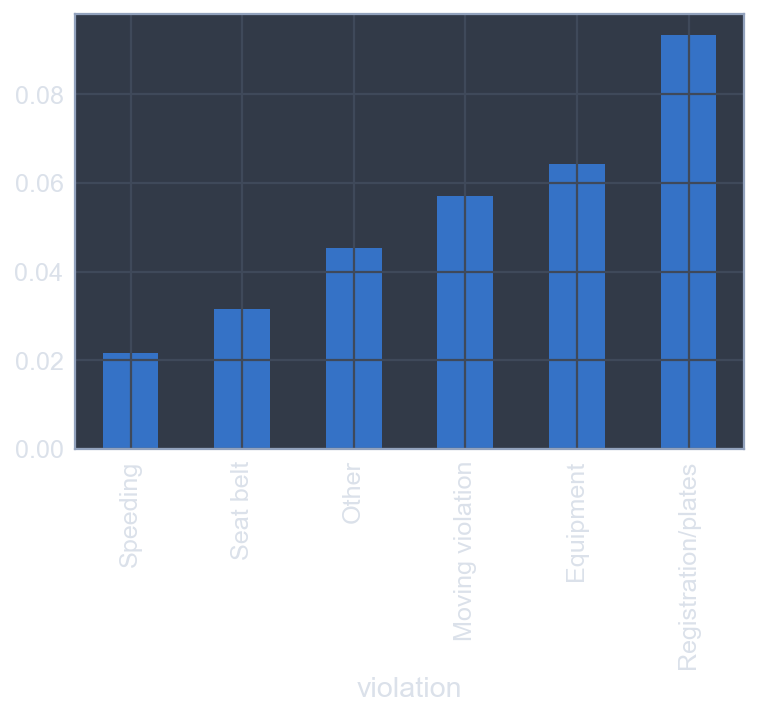

In [110]:
search_rate.sort_values().plot(kind='bar')
plt.show()

### Rotating the bars

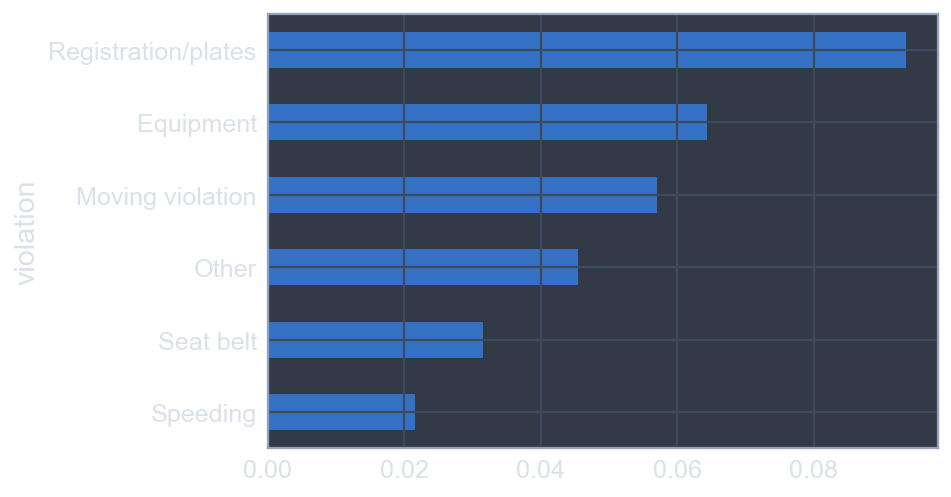

In [111]:
search_rate.sort_values().plot(kind='barh')
plt.show()

### №22 Converting stop durations to number

* Print the unique values in the `stop_duration` column
* Create a dictionary called `mapping` that maps the `stop_duration` strings to the integers specified above
* Convert the `stop_duration` strings to integers using the `mapping`, and store the results in a new column called `stop_minutes`
* Print the unique values in the `stop_minutes` column, to verify that the durations were properly converted to integers

In [112]:
print(ri.stop_duration.unique())
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

ri['stop_minutes'] = ri.stop_duration.map(mapping)
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


### №23 Plotting stop length

* For each value in the `violation_raw` column, calculate the mean number of `stop_minutes` that a driver is detained
* Save the resulting Series as a new object, `stop_length`
* Sort `stop_length` by its values, and then visualize it using a horizontal bar plot
* Display the plot

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


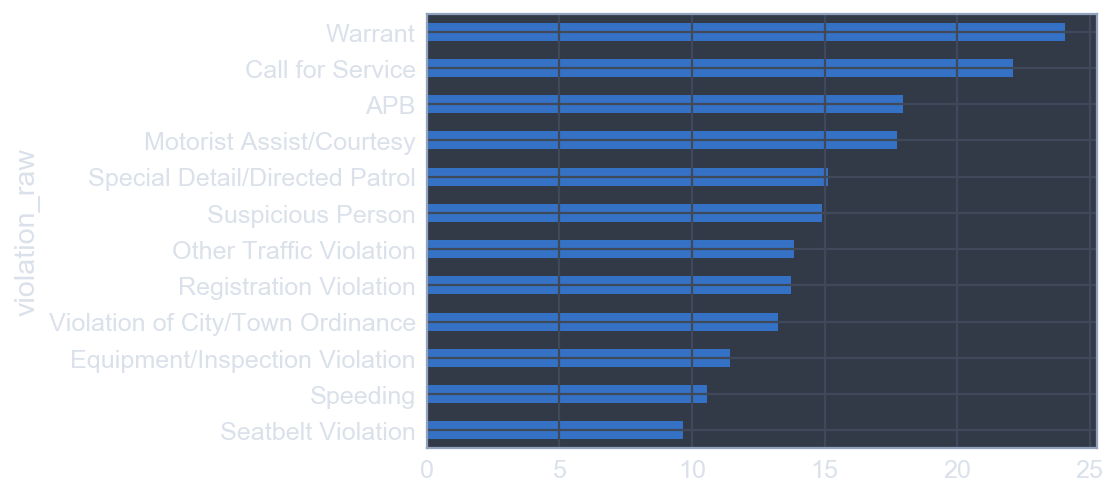

In [113]:
print(ri.groupby('violation_raw').stop_minutes.mean())
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

stop_length.sort_values().plot(kind='barh')
plt.show()

## Chapter 4. Analyzing the effect of weather on policing

## 11. Exploring the weather dataset

### Introduction to the dataset

<img src='Analyzing_Police_Activity_with_pandas/Pictures/Introduction_to_dataset.png' alt='Introduction to the dataset' width=600 align='left'>

### Examining the columns

* `TAVG`, `TMIN`, `TMAX`: Temperature
* `AWND`, `WSF2`: Wind speed
* `WT01` ... `WT22`: Bad weather conditions

In [114]:
weather = pd.read_csv('Analyzing_Police_Activity_with_pandas/weather.csv')
weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


### Examining wind speed

In [115]:
weather[['AWND', 'WSF2']].head()

,AWND,WSF2
0,8.95,25.1
1,9.40,14.1
2,6.93,17.0
3,6.93,16.1
4,7.83,17.0


In [116]:
weather[['AWND', 'WSF2']].describe()

,AWND,WSF2
count,4017.000000,4017.000000
mean,8.593707,19.274782
std,3.364601,5.623866
min,0.220000,4.900000
25%,6.260000,15.000000
50%,8.050000,17.900000
75%,10.290000,21.900000
max,26.840000,48.100000


### Creating a box plot

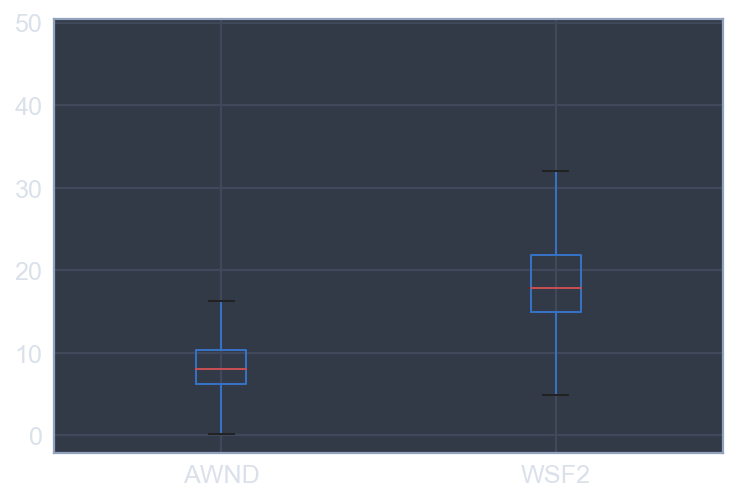

In [117]:
weather[['AWND', 'WSF2']].plot(kind='box')
plt.show()

### Creating a histogram (1)

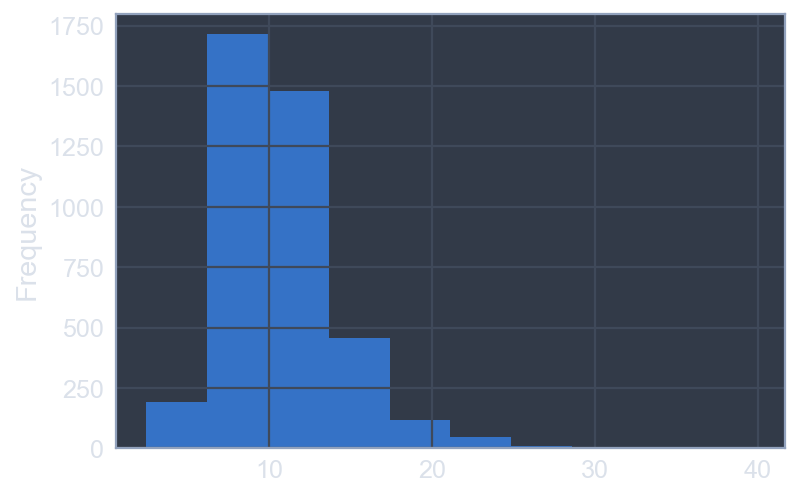

In [118]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')
plt.show()

### Creating a histogram (2)

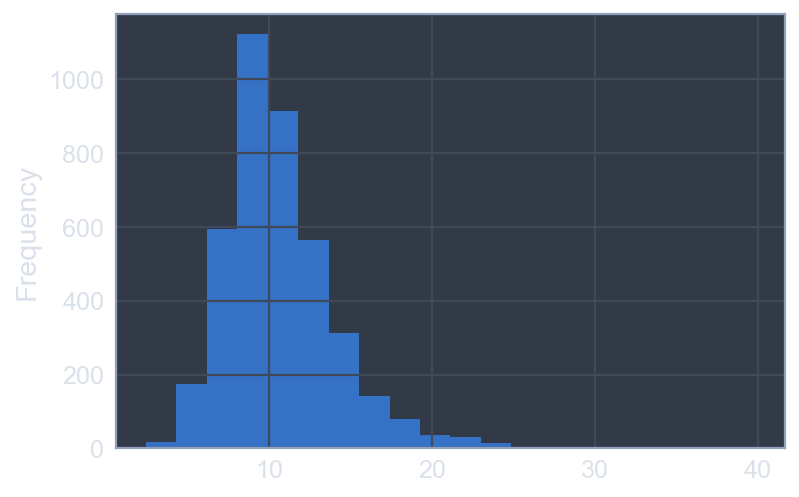

In [119]:
weather.WDIFF.plot(kind='hist', bins=20)
plt.show()

### №24 Plotting the temperature

* Read `weather.csv` into a DataFrame named `weather`
* Select the temperature columns (`TMIN`, `TAVG`, `TMAX`) and print their summary statistics using the `.describe()` method
* Create a box plot to visualize the temperature columns

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


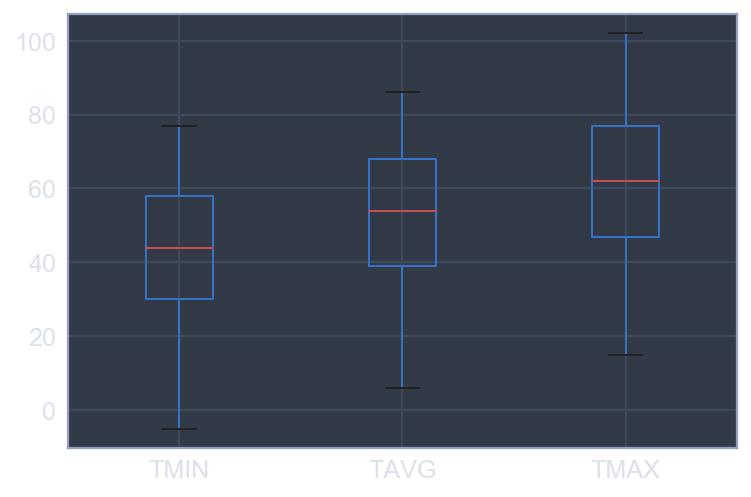

In [120]:
weather = pd.read_csv('Analyzing_Police_Activity_with_pandas/weather.csv')

print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

### №25 Plotting the temperature difference

* Create a new column in the weather DataFrame named `TDIFF` that represents the difference between the maximum and minimum temperatures
* Print the summary statistics for `TDIFF` using the `.describe()` method
* Create a histogram with 20 bins to visualize `TDIFF`
* Display the plot

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


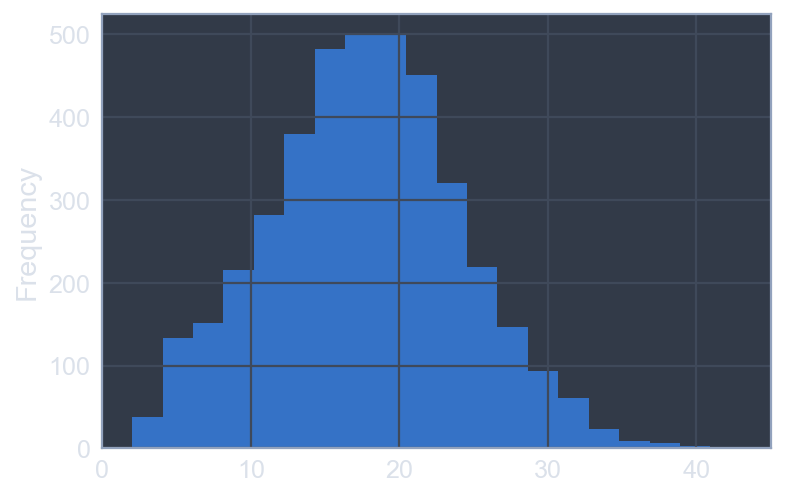

In [121]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']
print(weather.TDIFF.describe())

weather.TDIFF.plot(kind='hist', bins=20)
plt.show()

## 12. Categorizing the weather

### Selecting a DataFrame slice

In [122]:
weather.shape

(4017, 28)

In [123]:
weather.columns

Index(['STATION', 'DATE', 'TAVG', 'TMIN', 'TMAX', 'AWND', 'WSF2', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10',
       'WT11', 'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21',
       'WT22', 'TDIFF'],
      dtype='object')

In [124]:
temp = weather.loc[:, 'TAVG':'TMAX']
temp.shape

(4017, 3)

In [125]:
temp.columns

Index(['TAVG', 'TMIN', 'TMAX'], dtype='object')

### DataFrame operations

In [126]:
temp.head()

,TAVG,TMIN,TMAX
0,44.0,35,53
1,36.0,28,44
2,49.0,44,53
3,42.0,39,45
4,36.0,28,43


In [127]:
temp.sum()

TAVG     63884.0
TMIN    174677.0
TMAX    246116.0
dtype: float64

In [128]:
temp.sum(axis='columns').head()

0    132.0
1    108.0
2    146.0
3    126.0
4    107.0
dtype: float64

### Mapping one set of values to another

In [129]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [130]:
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'}
ri['stop_length'] = ri.stop_duration.map(mapping)

ri.stop_length.dtype

dtype('O')

### Changing data type from object to category

* Category type stores the data more efficiently
* Allows you to specify a logical order for the categories

In [131]:
ri.stop_length.unique()

array(['short', 'medium', 'long'], dtype=object)

In [132]:
ri.stop_length.memory_usage(deep=True)

8689481

In [133]:
cats = ['short', 'medium', 'long']
ri['stop_length'] = ri.stop_length.astype('category', ordered=True, categories=cats)

ri.stop_length.memory_usage(deep=True)

3400530

### Using ordered categories

In [134]:
ri.stop_length.head()

stop_datetime
2005-01-04 12:55:00     short
2005-01-23 23:15:00     short
2005-02-17 04:15:00     short
2005-02-20 17:15:00    medium
2005-02-24 01:20:00     short
Name: stop_length, dtype: category
Categories (3, object): [short < medium < long]

In [135]:
ri[ri.stop_length > 'short'].shape

(16959, 17)

In [136]:
ri.groupby('stop_length').is_arrested.mean()

stop_length
short     0.013654
medium    0.093595
long      0.261572
Name: is_arrested, dtype: float64

### №26 Counting bad weather conditions

* Copy the columns `WT01` through `WT22` from `weather` to a new DataFrame named `WT`
* Calculate the sum of each row in `WT`, and store the results in a new `weather` column named `bad_conditions`
* Replace any missing values in `bad_conditions` with a 0
* Create a histogram to visualize `bad_conditions`, and then display the plot

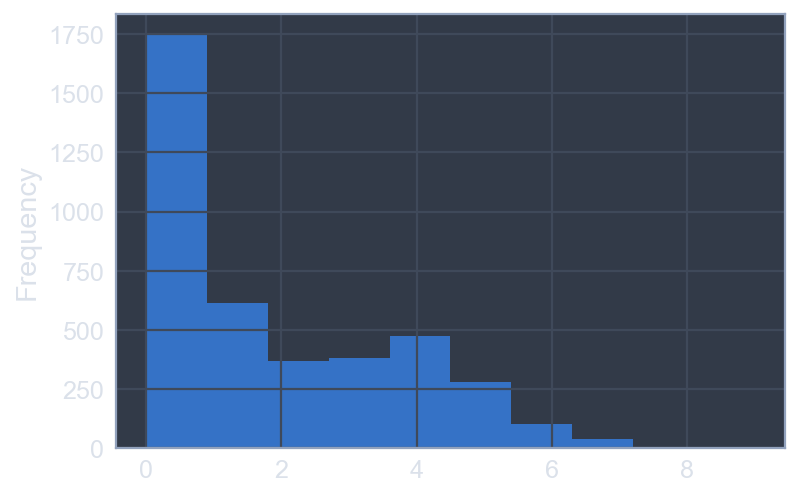

In [137]:
WT = weather.loc[:, 'WT01':'WT22']

weather['bad_conditions'] = WT.sum(axis='columns')
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

weather.bad_conditions.plot(kind='hist')
plt.show()

### №27 Rating the weather conditions

* Count the unique values in the `bad_conditions` column and sort the index
* Create a dictionary called `mapping` that maps the `bad_conditions` integers to strings as specified above
* Convert the `bad_conditions` integers to strings using the `mapping` and store the results in a new column called `rating`
* Count the unique values in `rating` to verify that the integers were properly converted to strings

In [138]:
print(weather.bad_conditions.value_counts().sort_index(), '\n')

mapping = {0: 'good',
           1: 'bad', 2: 'bad', 3: 'bad', 4: 'bad',
           5: 'worse', 6: 'worse', 7: 'worse', 8: 'worse', 9: 'worse'}

weather['rating'] = weather.bad_conditions.map(mapping)
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64 

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


### №28 Changing the data type to category

* Create a list object called `cats` that lists the weather ratings in a logical order: `'good'`, `'bad'`, `'worse'`
* Change the data type of the `rating` column from object to category. Make sure to use the cats list to define the category ordering
* Examine the head of the `rating` column to confirm that the categories are logically ordered

In [139]:
cats = ['good', 'bad', 'worse']

weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)

print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


## 13. Merging datasets

### Preparing the first DataFrame

In [140]:
apple.reset_index(inplace=True)
apple

,date_and_time,date,time,price
0,2018-02-13 16:00:00,2/13/18,16:00,164.34
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 16:00:00,2/15/18,16:00,172.99


### Preparing the second DataFrame

In [141]:
high_low = pd.DataFrame({'DATE': ['2/14/18', '2/15/18', '2/16/18'],
                         'HIGH': [167.54, 173.09, 174.82],
                         'LOW': [162.88, 169.00, 171.77]})
high_low

,DATE,HIGH,LOW
0,2/14/18,167.54,162.88
1,2/15/18,173.09,169.00
2,2/16/18,174.82,171.77


In [142]:
high = high_low[['DATE','HIGH']]
high

,DATE,HIGH
0,2/14/18,167.54
1,2/15/18,173.09
2,2/16/18,174.82


### Merging the DataFrames

* `left=apple`: Left DataFrame
* `right=high`: Right DataFrame
* `left_on='date'`: Key column in left DataFrame
* `right_on='DATE'`: Key column in right DataFrame
* `how='left'`: Type of join

In [143]:
apple_high = pd.merge(left=apple, right=high, left_on='date', right_on='DATE', how='left')

### Comparing the DataFrames

In [144]:
apple_high

,date_and_time,date,time,price,DATE,HIGH
0,2018-02-13 16:00:00,2/13/18,16:00,164.34,NaN,NaN
1,2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2,2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


In [145]:
apple

,date_and_time,date,time,price
0,2018-02-13 16:00:00,2/13/18,16:00,164.34
1,2018-02-14 16:00:00,2/14/18,16:00,167.37
2,2018-02-15 16:00:00,2/15/18,16:00,172.99


In [146]:
high

,DATE,HIGH
0,2/14/18,167.54
1,2/15/18,173.09
2,2/16/18,174.82


### Setting the index

In [147]:
apple_high.set_index('date_and_time', inplace=True)
apple_high

,date,time,price,DATE,HIGH
date_and_time,,,,,
2018-02-13 16:00:00,2/13/18,16:00,164.34,NaN,NaN
2018-02-14 16:00:00,2/14/18,16:00,167.37,2/14/18,167.54
2018-02-15 16:00:00,2/15/18,16:00,172.99,2/15/18,173.09


### №29 Preparing the DataFrames

* Reset the index of the `ri` DataFrame
* Examine the head of `ri` to verify that `stop_datetime` is now a DataFrame column, and the index is now the default integer index
* Create a new DataFrame named `weather_rating` that contains only the `DATE` and rating columns from the weather DataFrame
* Examine the head of `weather_rating` to verify that it contains the proper columns

In [148]:
ri.reset_index(inplace=True)
print(ri.head(), '\n')

weather_rating = weather[['DATE', 'rating']]
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

### №30 Merging the DataFrames

* Examine the shape of the `ri` DataFrame
* Merge the `ri` and `weather_rating` DataFrames using a left join
* Examine the shape of `ri_weather` to confirm that it has two more columns but the same number of rows as ri`
* Replace the index of `ri_weather` with the `stop_datetime` column

In [149]:
print(ri.shape)

ri_weather = pd.merge(left=ri, right=weather_rating,
                      left_on='stop_date', right_on='DATE',
                      how='left')
print(ri_weather.shape)

ri_weather.set_index('stop_datetime', inplace=True)

(86536, 18)
(86536, 20)


## 14. Does weather affect the arrest rate?

### Driver gender and vehicle searches

In [150]:
ri.search_conducted.mean()

0.0382153092354627

In [151]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [152]:
ri.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

### Examining a multi-indexed Series

In [153]:
search_rate = ri.groupby(['violation', 'driver_gender']).search_conducted.mean()
search_rate

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

In [154]:
type(search_rate)

pandas.core.series.Series

In [155]:
type(search_rate.index)

pandas.core.indexes.multi.MultiIndex

### Working with a multi-indexed Series

In [156]:
search_rate.loc['Equipment']

driver_gender
F    0.039984
M    0.071496
Name: search_conducted, dtype: float64

In [157]:
search_rate.loc['Equipment', 'M']

0.07149643705463182

### Converting a multi-indexed Series to a DataFrame

In [158]:
search_rate.unstack()

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


In [159]:
type(search_rate.unstack())

pandas.core.frame.DataFrame

In [160]:
ri.pivot_table(index='violation', columns='driver_gender', values='search_conducted')

driver_gender,F,M
violation,,
Equipment,0.039984,0.071496
Moving violation,0.039257,0.061524
Other,0.041018,0.046191
Registration/plates,0.054924,0.108802
Seat belt,0.017301,0.035119
Speeding,0.008309,0.027885


### №31 Comparing arrest rates by weather rating

1. Calculate the overall arrest rate by taking the mean of the `is_arrested` Series

In [161]:
print(ri_weather.is_arrested.mean())

0.0355690117407784


2. Calculate the arrest rate for each weather `rating` using a `.groupby()`

In [162]:
print(ri_weather.groupby('rating').is_arrested.mean())

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64


3. Calculate the arrest rate for each combination of `violation` and `rating`. How do the arrest rates differ by group?

In [163]:
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


### №32 Selecting from a multi-indexed Series

* Save the output of the `.groupby()` operation from the last exercise as a new object, `arrest_rate`
* Print the `arrest_rate` Series and examine it
* Print the arrest rate for moving violations in bad weather
* Print the arrest rates for speeding violations in all three weather conditions

In [164]:
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()
print(arrest_rate, '\n')
print(arrest_rate['Moving violation']['bad'], '\n')
print(arrest_rate['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64 

0.05804964058049641 

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


### №33 Reshaping the arrest rate data

* Unstack the `arrest_rate` Series to reshape it into a DataFrame
* Create the exact same DataFrame using a pivot table! Each of the three `.pivot_table()` parameters should be specified as one of the `ri_weather` columns

In [165]:
print(arrest_rate.unstack(), '\n')
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886 

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
